In [293]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt 


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [294]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [295]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [296]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [297]:
X_train = X_train.float()
X_test = X_test.float()

In [298]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [299]:
y_test.shape, y_train.shape

(torch.Size([10000]), torch.Size([60000]))

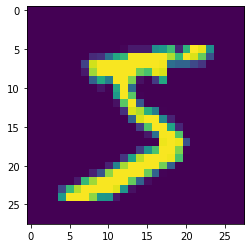

tensor(5)


In [302]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])


In [254]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [255]:
X_train.shape, X_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

# **Распознование рукописных чисел  полносвязной сетью**


In [256]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [257]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [258]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(15):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes] 
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9097)
tensor(0.9095)
tensor(0.9201)
tensor(0.9211)
tensor(0.9322)
tensor(0.9254)
tensor(0.9251)
tensor(0.9311)
tensor(0.9263)
tensor(0.9303)
tensor(0.9319)
tensor(0.9289)
tensor(0.9326)
tensor(0.9316)
tensor(0.9377)


In [259]:

    
mnist_net1 = MNISTNet(100)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net1.parameters(), lr=1.0e-3)

batch_size = 500

test_accuracy_history1 = []
test_loss_history1 = []

for epoch in range(15):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes] 
        
        preds = mnist_net1.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net1.forward(X_test)
    test_loss_history1.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history1.append(accuracy)
    print(accuracy)

tensor(0.9036)
tensor(0.9229)
tensor(0.9273)
tensor(0.9327)
tensor(0.9326)
tensor(0.9380)
tensor(0.9401)
tensor(0.9407)
tensor(0.9402)
tensor(0.9437)
tensor(0.9434)
tensor(0.9403)
tensor(0.9447)
tensor(0.9460)
tensor(0.9451)


График точности в зависимости от размера батчей:

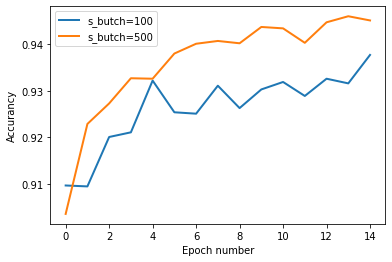

In [260]:
plt.xlabel("Epoch number")
plt.ylabel("Accurancy")
plt.plot(test_accuracy_history, lw = 2,  label="s_butch=100")
plt.plot(test_accuracy_history1, lw = 2,  label="s_butch=500")
plt.legend();


График loss функции в зависимости от размера батчей:


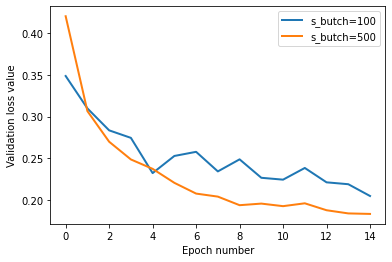

In [261]:
plt.xlabel("Epoch number")
plt.ylabel("Validation loss value")
plt.plot(test_loss_history, lw = 2,  label="s_butch=100");
plt.plot(test_loss_history1, lw = 2,  label="s_butch=500");
plt.legend()

# **Распознование цифр с помощью сверточной нейронной сети:**


In [262]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [263]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [264]:
X_train.shape

torch.Size([60000, 1, 28, 28])

Функция активации tanh(), парааметр learning rate у оптимизатора Adam = 1.0e-3

In [265]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    


In [266]:
lenet5 = LeNet5()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [267]:
batch_size = 700

test_accuracy_historyb700 = []
test_loss_historyb700 = []


for epoch in range(15):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_historyb700.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_historyb700.append(accuracy)
    
    print(accuracy)

tensor(0.9539)
tensor(0.9763)
tensor(0.9827)
tensor(0.9834)
tensor(0.9859)
tensor(0.9872)
tensor(0.9853)
tensor(0.9876)
tensor(0.9891)
tensor(0.9871)
tensor(0.9879)
tensor(0.9894)
tensor(0.9892)
tensor(0.9887)
tensor(0.9899)


Модель сверточной нейронной сети та же, но размер батча уменьшен до 200

In [268]:
lenet5b=LeNet5()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5b.parameters(), lr=1.0e-3)

In [269]:
batch_size = 200

test_accuracy_historyb200 = []
test_loss_historyb200 = []


for epoch in range(15):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = lenet5b.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5b.forward(X_test)
    test_loss_historyb200.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_historyb200.append(accuracy)
    
    print(accuracy)

tensor(0.9739)
tensor(0.9798)
tensor(0.9847)
tensor(0.9855)
tensor(0.9857)
tensor(0.9854)
tensor(0.9884)
tensor(0.9861)
tensor(0.9887)
tensor(0.9881)
tensor(0.9880)
tensor(0.9884)
tensor(0.9866)
tensor(0.9882)
tensor(0.9880)


График точности в зависимости от размера батча:


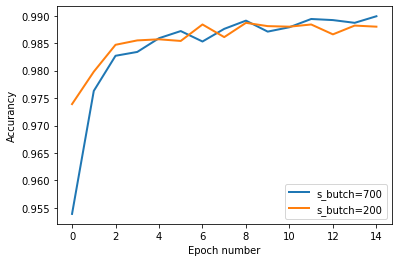

In [270]:
plt.xlabel("Epoch number")
plt.ylabel("Accurancy")

plt.plot(test_accuracy_historyb700, lw = 2,  label="s_butch=700");
plt.plot(test_accuracy_historyb200, lw = 2,  label="s_butch=200");

plt.legend();

График loss функции в зависимости от размера батча:

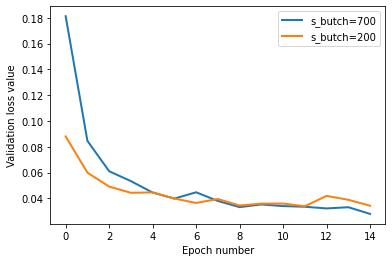

In [271]:
plt.xlabel("Epoch number")
plt.ylabel("Validation loss value")

plt.plot(test_loss_historyb700, lw = 2,  label="s_butch=700");
plt.plot(test_loss_historyb200, lw = 2,  label="s_butch=200");

plt.legend();

In [272]:
lenet5_n = LeNet5()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5_n.parameters(), momentum=0.7, lr=1.0e-2)

In [273]:
batch_size = 200

test_accuracy_historyb700 = []
test_loss_historyb700 = []


for epoch in range(15):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = lenet5_n.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5_n.forward(X_test)
    test_loss_historyb700.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_historyb700.append(accuracy)
    
    print(accuracy)

tensor(0.8934)
tensor(0.9391)
tensor(0.9523)
tensor(0.9607)
tensor(0.9671)
tensor(0.9720)
tensor(0.9753)
tensor(0.9761)
tensor(0.9784)
tensor(0.9788)
tensor(0.9800)
tensor(0.9803)
tensor(0.9811)
tensor(0.9825)
tensor(0.9828)


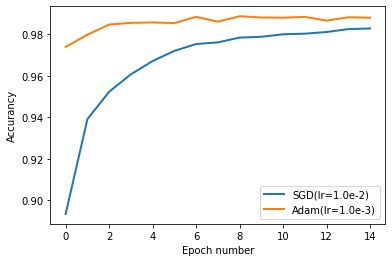

In [274]:
plt.xlabel("Epoch number")
plt.ylabel("Accurancy")

plt.plot(test_accuracy_historyb700, lw = 2,  label="SGD(lr=1.0e-2)");
plt.plot(test_accuracy_historyb200, lw = 2,  label="Adam(lr=1.0e-3)");

plt.legend();

Изменение структуры сверточной сети:



In [275]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [276]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [277]:
class LeNet5_up(torch.nn.Module):
    def __init__(self):
        super(LeNet5_up, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=1)
        self.conv11 = torch.nn.Conv2d(
            in_channels=6, out_channels=6, kernel_size=3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=3, padding=0)
        self.conv22 = torch.nn.Conv2d(
            in_channels=16, out_channels=16, kernel_size=3, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.conv11(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.conv22(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    


In [278]:
lenet5_up = LeNet5_up()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5_up.parameters(), lr=1.0e-2)

In [279]:
batch_size = 700

test_accuracy_history_up = []
test_loss_history_up = []


for epoch in range(15):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = lenet5_up.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5_up.forward(X_test)
    test_loss_history_up.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_history_up.append(accuracy)
    
    print(accuracy)

tensor(0.9305)
tensor(0.9623)
tensor(0.9691)
tensor(0.9732)
tensor(0.9783)
tensor(0.9795)
tensor(0.9794)
tensor(0.9733)
tensor(0.9819)
tensor(0.9757)
tensor(0.9774)
tensor(0.9780)
tensor(0.9732)
tensor(0.9786)
tensor(0.9818)


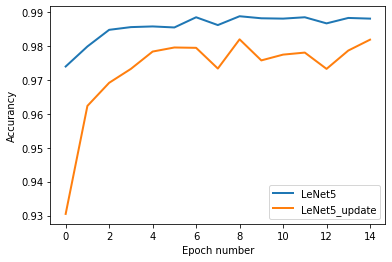

In [280]:
plt.xlabel("Epoch number")
plt.ylabel("Accurancy")

plt.plot(test_accuracy_historyb200, lw = 2,  label="LeNet5");
plt.plot(test_accuracy_history_up, lw = 2,  label="LeNet5_update");

plt.legend();